<a href="https://colab.research.google.com/github/Raden616Rizki/PCVK_Ganjil_2023/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. TUGAS PRAKTIKUM**

1. import folder yang ada di Drive Anda dengan cara sebagai berikut

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

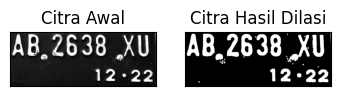

In [83]:
#Dilasi tanpa library

def dilasi_citra(F, w):
  #size image
  p, q = F.shape
  imgD = np.zeros((p, q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED = np.ones((w, w), dtype=np.uint8)
  constant1 = (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp * SED
      imgD[i, j] = np.max(product)

  return imgD


def gamma_correction(image, gamma):
  inv_gamma = 1 / gamma
  gamma_image = np.zeros(image.shape, image.dtype)

  # Akses per pixel
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        gamma_image[y, x] = np.clip((image[y, x] / 255) ** inv_gamma * 255, 0, 255)

  return gamma_image

img_d = cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0)

img_d_1 = gamma_correction(img_d, 0.3)

ret, thresh = cv2.threshold(img_d_1, 125, 200, cv2.THRESH_BINARY)
w = 5

imgD = dilasi_citra(thresh, w)

plt.subplot(131) ,plt.imshow(img_d_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

[[1 1 1]
 [1 1 1]
 [1 1 1]]


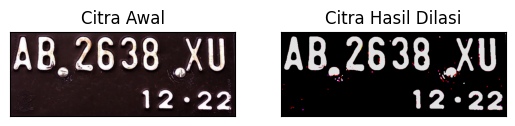

In [84]:
img = cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg')
#img = cv2.imread('morp.jpg',0)

img_1 = gamma_correction(img, 0.3)

ret, thresh = cv2.threshold(img_1, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(img_1), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilasi), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

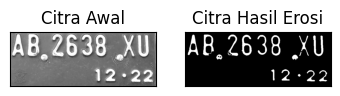

In [85]:
#Erosi Tanpa Library
def erosi_citra(F, k):
  #size image
  m, n = F.shape

  #Generate structure element erosi (SE)
  SE = np.ones((k, k), dtype = np.uint8)
  constant = (k-1)//2
  imgE = np.zeros((m,n), dtype = np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp * SE
      imgE[i,j] = np.min(product)

  return imgE

img_e = cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0)

ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131), plt.imshow(img_e, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

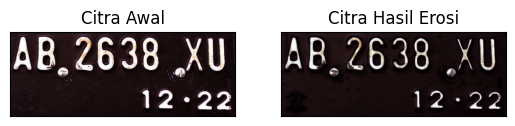

In [86]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg')
img_1 = gamma_correction(img, 0.26)

kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img_1, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img_1), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV

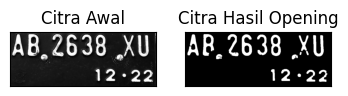

In [87]:
img_o= cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0) #
img_o_1 = gamma_correction(img_o, 0.3)

reto, thresho = cv2.threshold(img_o_1, 127, 225, cv2.THRESH_BINARY)
k = 7
imgO = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img_o_1,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

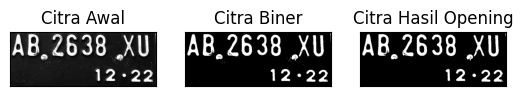

In [88]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0)
img_1 = gamma_correction(img, 0.3)

ret, thresh = cv2.threshold(img_1, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.subplot(131), plt.imshow(img_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(openn, cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

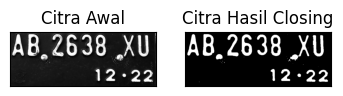

In [89]:
img_c= cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0) #
img_c_1 = gamma_correction(img_c, 0.3)

retc, threshc = cv2.threshold(img_c_1, 127, 225, cv2.THRESH_BINARY)
k = 7
imgC = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131), plt.imshow(img_c_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgC, cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

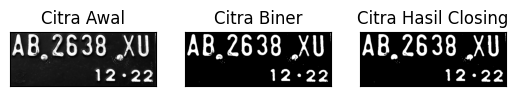

In [90]:
img = cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0)
img_1 = gamma_correction(img, 0.3)

ret, thresh = cv2.threshold(img_1, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closs, cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

SED = Cross 3


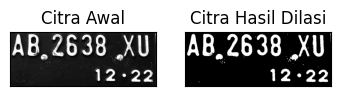

SED = Cross 5


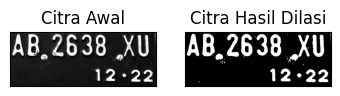

In [91]:
#Dilasi Cross SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

print('SED = Cross 3')
img_d = cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0)
img_d_1 = gamma_correction(img_d, 0.3)

ret, thresh = cv2.threshold(img_d_1, 127, 225, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p, q= F.shape
  imgD= np.zeros((p, q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)

  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp * SED
      imgD[i, j]= np.max(product)

  return imgD

print('SED = Cross 5')
img_d = cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0)
img_d_1 = gamma_correction(img_d, 0.3)

ret, thresh = cv2.threshold(img_d_1, 127, 255, cv2.THRESH_BINARY)
w = 5
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

SED = Circle 3


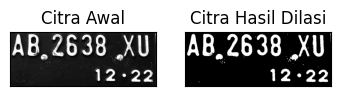

SED = Circle 5


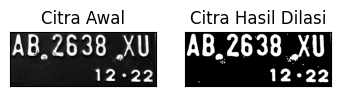

In [92]:
#Dilasi Circular SED
def dilasi_citra(F,w):
  #size image
  p, q= F.shape
  imgD= np.zeros((p, q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w, w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp * SED
      imgD[i, j]= np.max(product)

  return imgD

print('SED = Circle 3')
img_d = cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0)
img_d_1 = gamma_correction(img_d, 0.3)

ret, thresh = cv2.threshold(img_d_1, 127, 225, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0)
img_d_1 = gamma_correction(img_d, 0.3)

ret, thresh = cv2.threshold(img_d_1, 127, 255, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)
plt.subplot(131), plt.imshow(img_d_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

SE = Rectangle 3x5


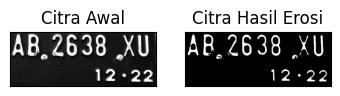

SE = Rectangle 5x7


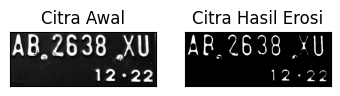

In [93]:
#Erosi Cross SE
def erosi_citra(F, p, l):
  #size image
  m, n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l)) #SE persegi panjang
  constant1 = (l-1)//2
  constant2 = (p-1)//2

  # print(SE)
  imgE = np.zeros((m, n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp = F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product = temp * SE
      imgE[i, j] = np.min(product)

  return imgE

print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0) #
img_e_1 = gamma_correction(img_e, 0.3)

ret1, thresh1 = cv2.threshold(img_e_1, 127, 225, cv2.THRESH_BINARY)
p = 5
l = 3
imgE = erosi_citra(thresh1, p, l)

plt.subplot(131), plt.imshow(img_e_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0) #
img_e_1 = gamma_correction(img_e, 0.3)

ret1, thresh1 = cv2.threshold(img_e_1, 127, 225, cv2.THRESH_BINARY)
p = 7
l = 5
imgE = erosi_citra(thresh1, p, l)

plt.subplot(131), plt.imshow(img_e_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

SE = Line Vertikal 3


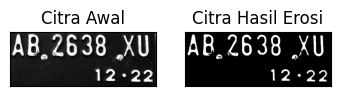

SE = Line Vertikal 5


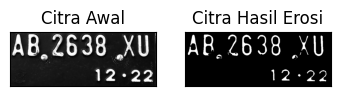

In [94]:
#Erosi Line Vertikal SE
def erosi_citra(F, k):
  #size image
  m, n = F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, k)) #SEline vertikal
  constant = (k-1)//2
  imgE = np.zeros((m, n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp * SE
      imgE[i, j]= np.min(product)

  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0) #
img_e_1 = gamma_correction(img_e, 0.3)

ret1, thresh1 = cv2.threshold(img_e_1, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1, k)
plt.subplot(131), plt.imshow(img_e_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/Images/plat_nomor/plat_motor_1.jpg',0) #
img_e_1 = gamma_correction(img_e, 0.3)

ret1, thresh1 = cv2.threshold(img_e_1, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1, k)
plt.subplot(131), plt.imshow(img_e_1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

13. TopHat

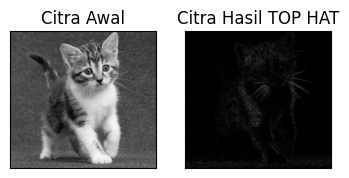

In [95]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/Images/kitten01.jpg')

input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(input_image, cv2.MORPH_TOPHAT, kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131), plt.imshow(input_image, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(tophat_img, cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

14. BLACKHAT

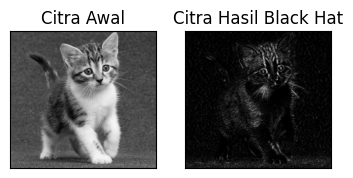

In [96]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(blackhat, cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

15. Skeleton

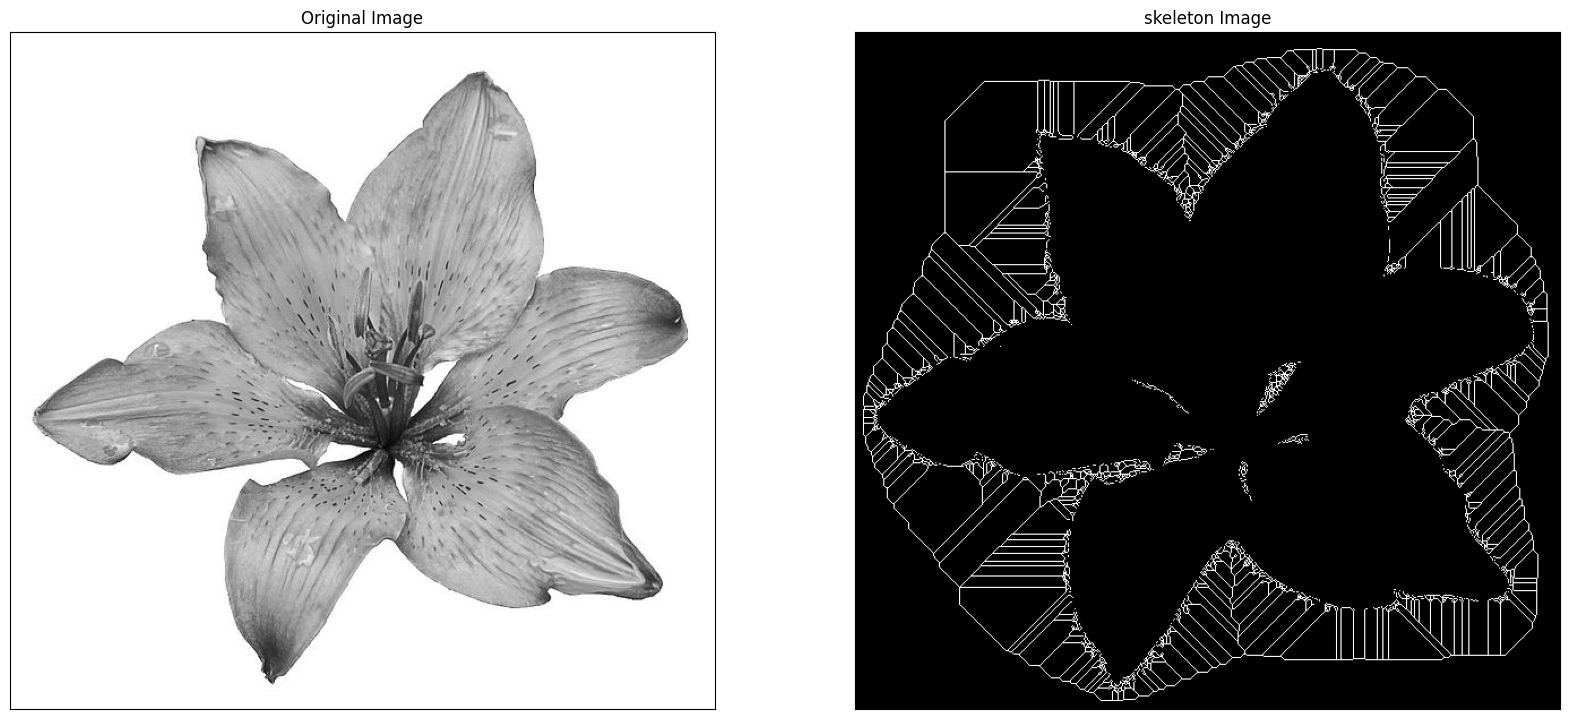

In [97]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize
# read image
img = cv.imread('/content/drive/MyDrive/Images/lily.jpg', 0)
binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()

16. Skeleton Inverse

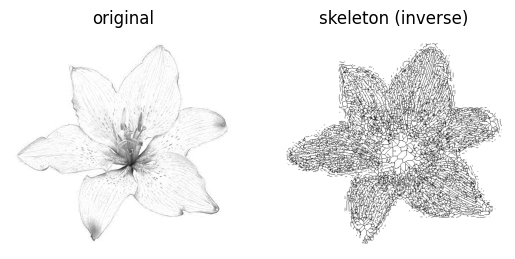

In [98]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/Images/lily.jpg')[..., 0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

17. Thickening

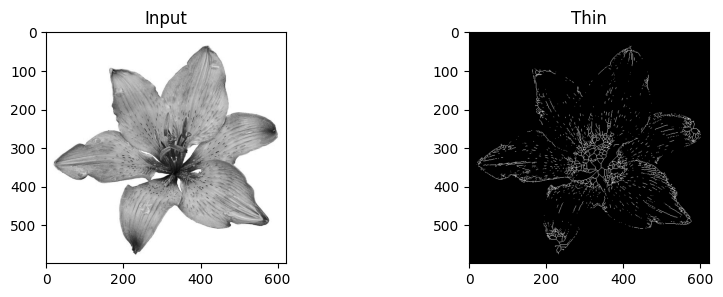

In [99]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

**B. Tugas Praktikum**

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

Gray Image


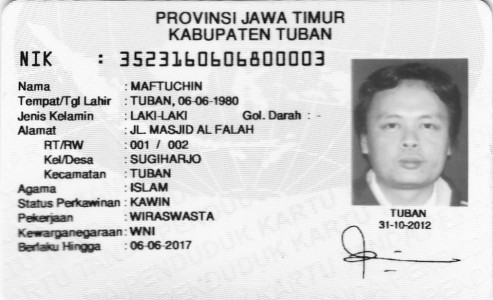

Final Image


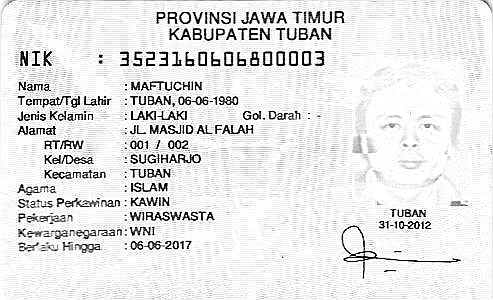

In [104]:
from google.colab.patches import cv2_imshow

def convolution2d(image, kernel):
    tinggi = image.shape[0]
    lebar = image.shape[1]

    tinggi_kernel = kernel.shape[0]
    lebar_kernel = kernel.shape[1]

    start = int(lebar_kernel/2)

    image_result = np.copy(image)

    for y in range(start, tinggi - start):
        for x in range(start, lebar - start):
            value = 0

            for ky in range(tinggi_kernel):
                for kx in range(lebar_kernel):
                    i = y - start + ky
                    j = x - start + kx

                    value += image[i, j] * kernel[ky, kx]

            image_result[y, x] = np.clip(value, 0, 255)

    return image_result

img = cv2.imread('/content/drive/MyDrive/Images/KTP_More/ktp4.png', 0)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

inverted_image = cv2.bitwise_not(blackhat)

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

result_image = convolution2d(inverted_image, kernel_sharpen)

print('Gray Image')
cv2_imshow(img)

print('Final Image')
cv2_imshow(result_image)

Gray Image


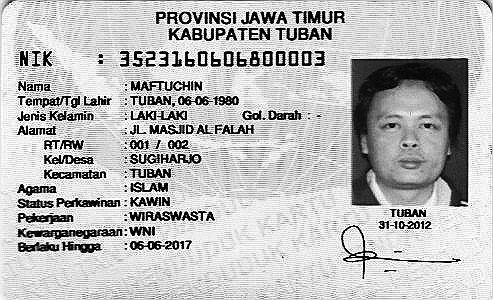

Final Image


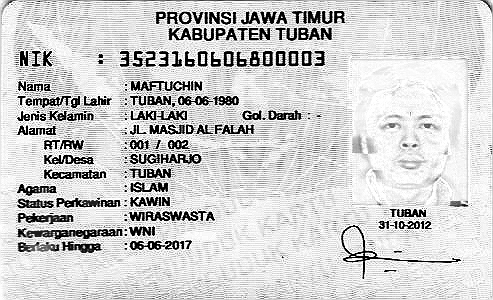

In [105]:
img = cv2.imread('/content/drive/MyDrive/Images/KTP_More/ktp4_filtered.png', 0)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

inverted_image = cv2.bitwise_not(blackhat)

print('Gray Image')
cv2_imshow(img)

print('Final Image')
cv2_imshow(inverted_image)